# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Yahya Faqihuddin Ar-royhan
- Email: hansisroy@gmail.com
- Id Dicoding: yahyafa

## Menentukan Pertanyaan Bisnis

- berapa penggunaan rental pada weekdays dan weekend dan pada jam berapakah paling sering terjadi perentalan?
- Apa pengaruh cuaca terhadap jumlah perentalan?
- apa pengaruh musim terhadap jumlah perentalan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/Users/User Arch/Downloads/day.csv')
hour_df = pd.read_csv('/Users/User Arch/Downloads/hour.csv')

### Assessing Data

In [3]:
#mengecek apakah ada data yang kosong/tidak memiliki nilai
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#mengecek apakah ada data yang kosong/tidak memiliki nilai
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
#mengecek apakah ada data yang terduplikasi
day_df.duplicated().sum()

0

In [6]:
#mengecek apakah ada data yang terduplikasi
hour_df.duplicated().sum()

0

### Cleaning Data

karena data tidak memiliki missing values dan duplicates maka data sudah bersih

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
#menampilkan 5 data teratas
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#menampilkan info tentang dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
#menampilkan statistik tentang dataset
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
#mengganti nama kolom untuk mempermudah analisis
hour_df = hour_df.rename(columns= {'weathersit': 'weather',
                                   'yr': 'year',
                                   'mnth': 'month',
                                   'hr': 'hour',
                                   'hum': 'humidity',
                                   'cnt': 'count' })
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
#menghapus kolom yang tidak perlu
hour_df = hour_df.drop(columns= ['instant','dteday', 'year'])

In [15]:
#mengubah tipedata kolom dari int ke category
cols = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']

for col in cols:
    hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


In [16]:
#memfilter dataset berdasarkan jumlah pengguna rental & season
season_analysis = day_df.iloc[:,[2,13,14,15]]
season_analysis

,season,casual,registered,cnt
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [17]:
#mempersiapkan keterangan season berupa kategori beradasarkan dataset
sea = ['springer','summer','fall','winter']

In [18]:
#mengganti keterangan season dari int menjadi kategori beradasarkan dataset
season_analysis['season'] = season_analysis['season'].replace([1, 2, 3, 4], sea)

C:\Users\User Arch\AppData\Local\Temp\ipykernel_2704\2590549818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_analysis['season'] = season_analysis['season'].replace([1, 2, 3, 4], sea)


In [19]:
#menampilkan total hasil berupa pivot table
season_analysis_result= season_analysis.groupby('season').sum()
season_analysis_result

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


In [20]:
#memfilter dataset berdasarkan jumlah pengguna rental & musim liburan (holiday)
holiday_analysis = day_df.iloc[:,[5,13,14,15]]
holiday_analysis

,holiday,casual,registered,cnt
0,0,331,654,985
1,0,131,670,801
2,0,120,1229,1349
3,0,108,1454,1562
4,0,82,1518,1600
...,...,...,...,...
726,0,247,1867,2114
727,0,644,2451,3095
728,0,159,1182,1341
729,0,364,1432,1796


In [21]:
#mempersiapkan keterangan holiday berupa kategori beradasarkan dataset
holi = ['workday','holiday']

In [22]:
#mengganti keterangan holiday dari int menjadi kategori beradasarkan dataset
holiday_analysis['holiday'] = holiday_analysis['holiday'].replace([0, 1], holi)

C:\Users\User Arch\AppData\Local\Temp\ipykernel_2704\3849111644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_analysis['holiday'] = holiday_analysis['holiday'].replace([0, 1], holi)


In [23]:
#menampilkan total hasil dalam bentuk pivot table
holiday_analysis_result= holiday_analysis.groupby('holiday').sum()
holiday_analysis_result

,casual,registered,cnt
holiday,,,
holiday,22359,56076,78435
workday,597658,2616586,3214244


In [24]:
#memfilter dataset berdasarkan jumlah pengguna rental & cuaca
weather_analysis = day_df.iloc[:,[8,13,14,15]]
weather_analysis

,weathersit,casual,registered,cnt
0,2,331,654,985
1,2,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,2,247,1867,2114
727,2,644,2451,3095
728,2,159,1182,1341
729,1,364,1432,1796


In [25]:
#mempersiapkan keterangan weather berupa kategori beradasarkan dataset
wthr = ['clear','cloudy','light rain']

In [26]:
#mengganti keterangan holiday dari int menjadi kategori beradasarkan dataset
weather_analysis['weathersit'] = weather_analysis['weathersit'].replace([1, 2, 3], wthr)

C:\Users\User Arch\AppData\Local\Temp\ipykernel_2704\4013874552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_analysis['weathersit'] = weather_analysis['weathersit'].replace([1, 2, 3], wthr)


In [27]:
#menampilkan total hasil dalam bentuk pivot table
weather_analysis_result= weather_analysis.groupby('weathersit').sum()
weather_analysis_result

,casual,registered,cnt
weathersit,,,
clear,446346,1811606,2257952
cloudy,169776,827082,996858
light rain,3895,33974,37869


## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa penggunaan rental pada weekdays dan weekend dan pada jam berapakah paling sering terjadi perentalan?

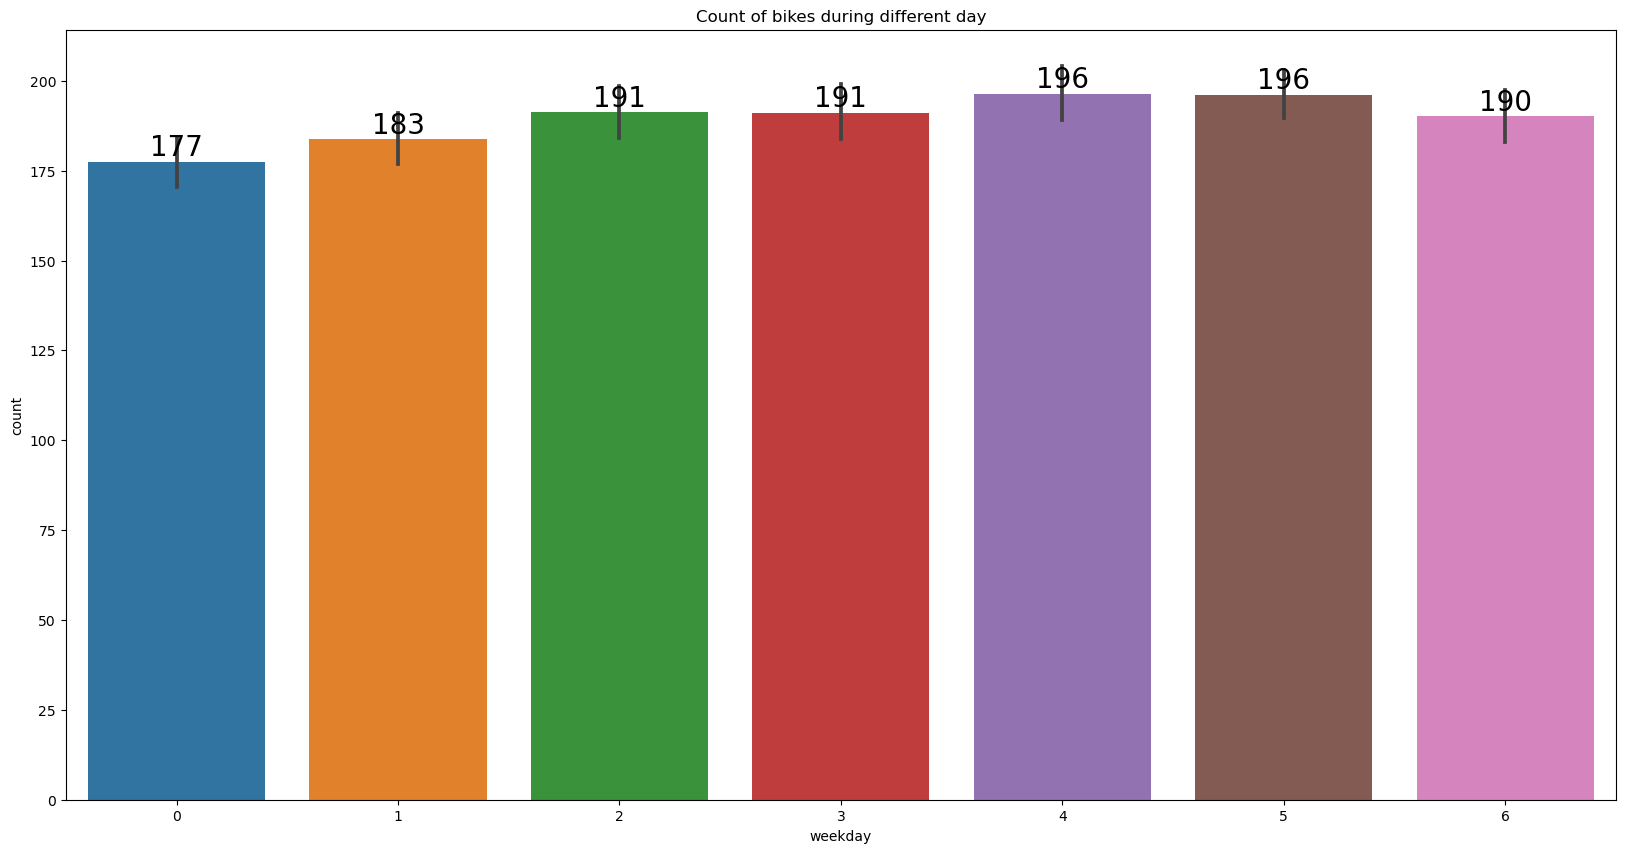

In [28]:
#membuat grafik bar plot untuk mengetahui jumlah pengguna berdasarkan hari
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hour_df, x='weekday', y='count', ax=ax)
ax.set(title = 'Count of bikes during different day')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=20)


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

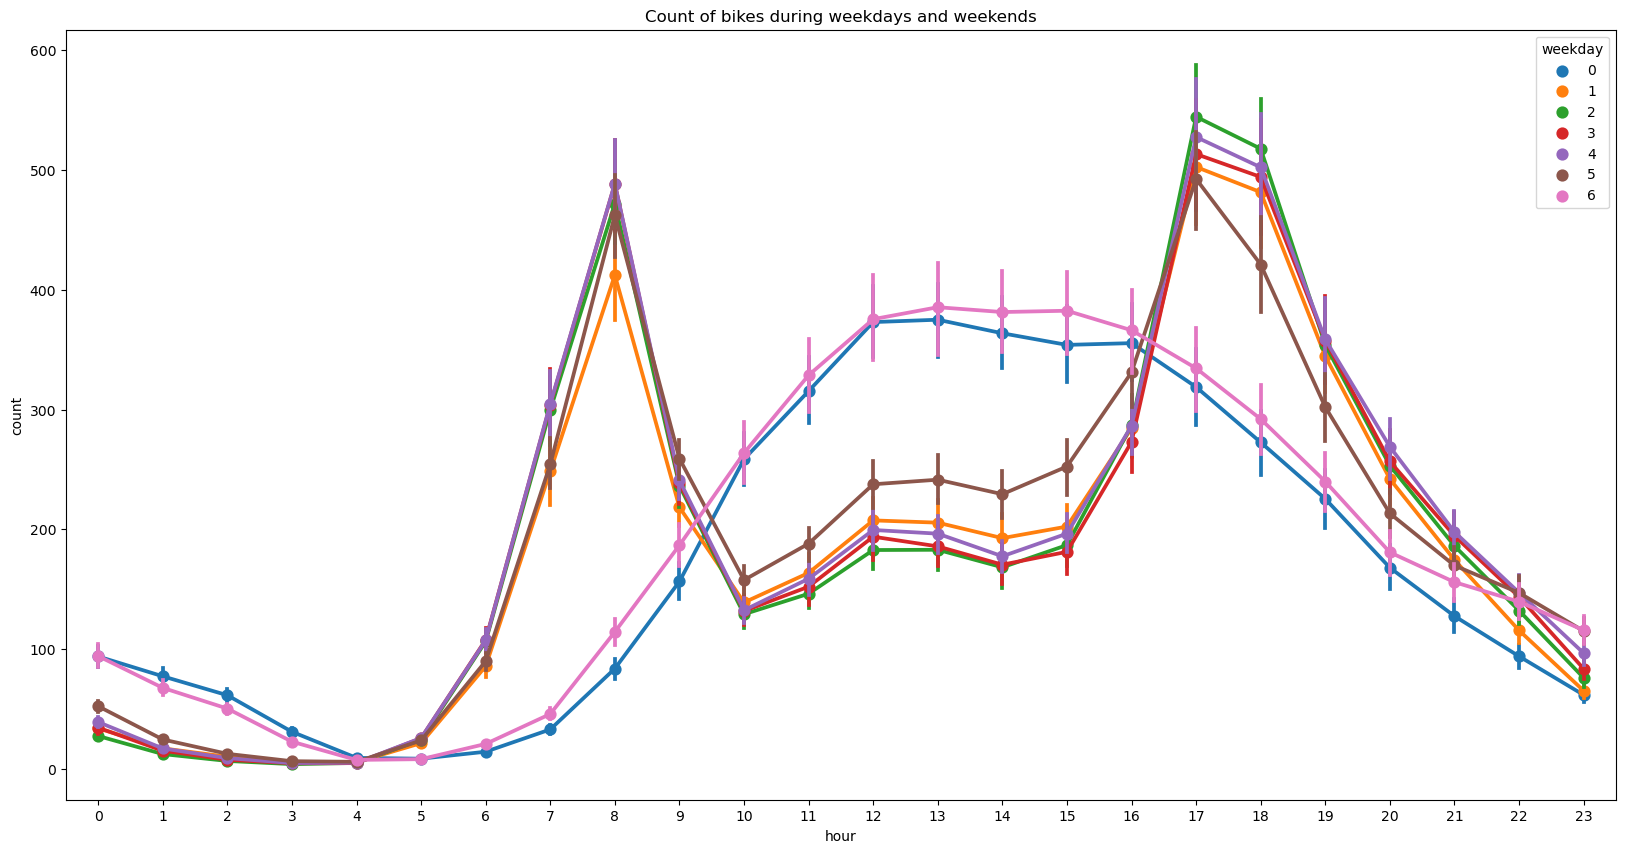

In [29]:
#membuat grafik point plot untuk mengetahui jumlah TOTAL pengguna rental pada weekday dan weekend
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title = 'Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

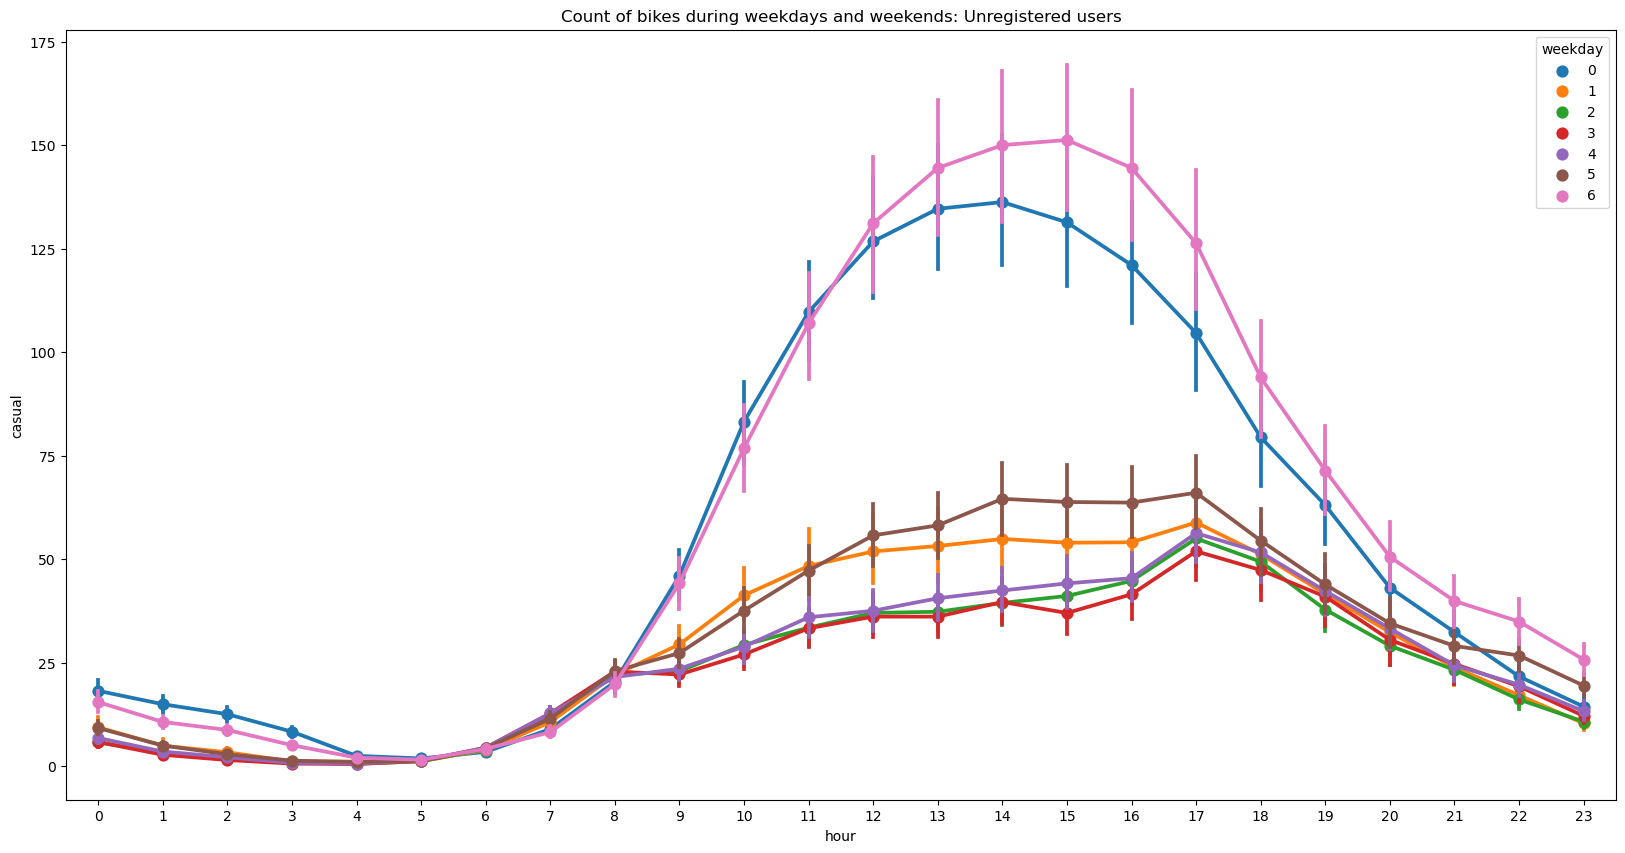

In [30]:
#membuat grafik point plot untuk mengetahui jumlah pengguna unregistered pada weekday dan weekend
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title = 'Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

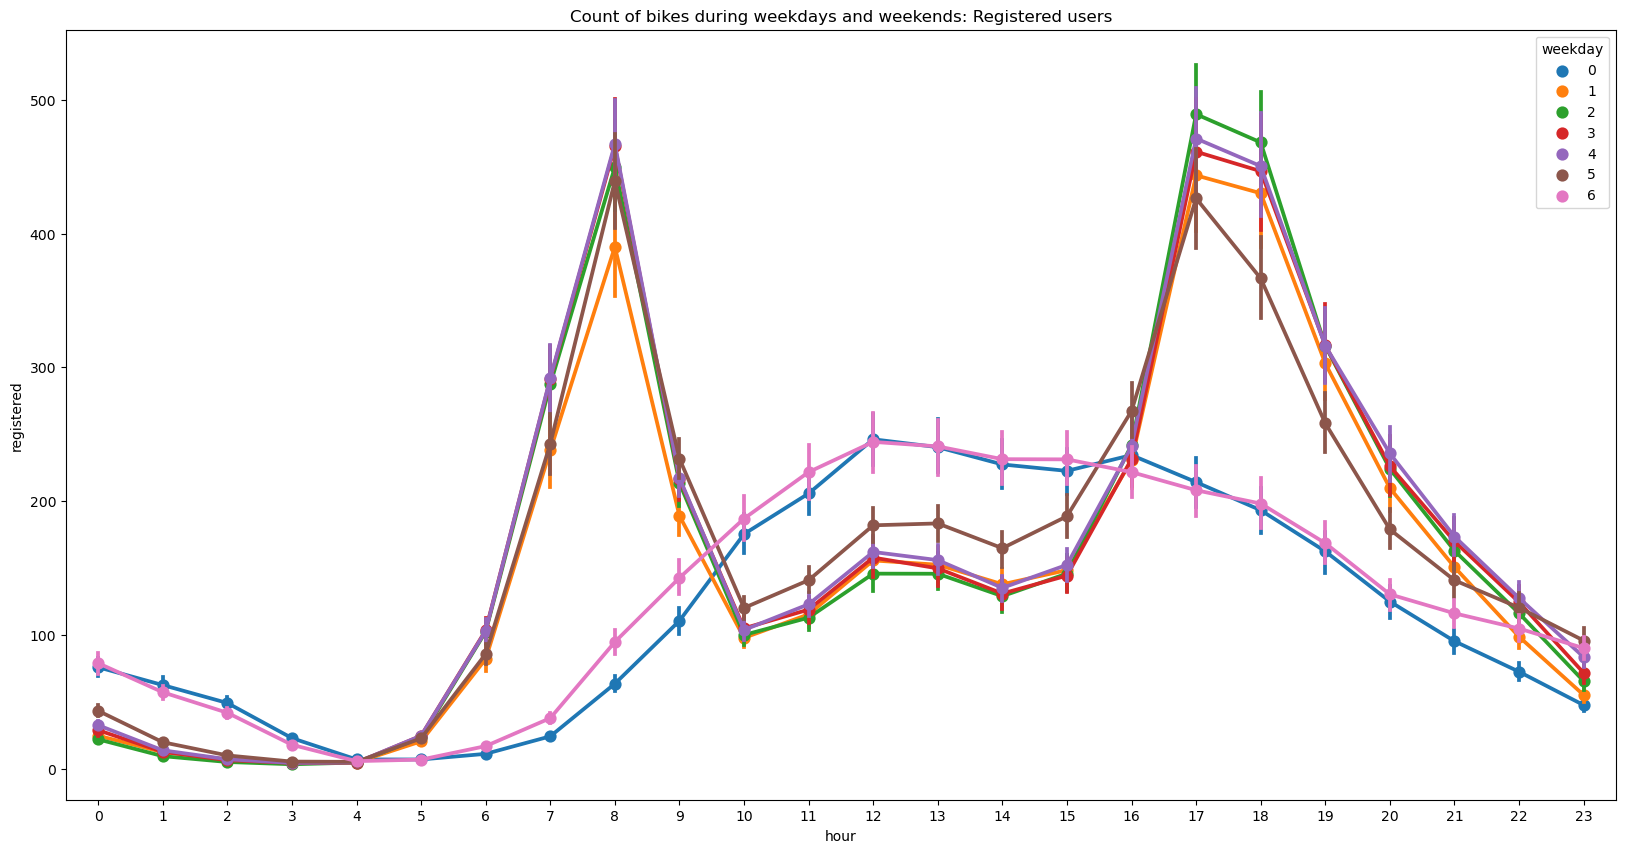

In [31]:
#membuat grafik point plot untuk mengetahui jumlah pengguna registered pada weekday dan weekend
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title = 'Count of bikes during weekdays and weekends: Registered users')

### Pertanyaan 2: Apa pengaruh cuaca terhadap jumlah perentalan?

[Text(0.5, 1.0, 'Count of bikes during different weather')]

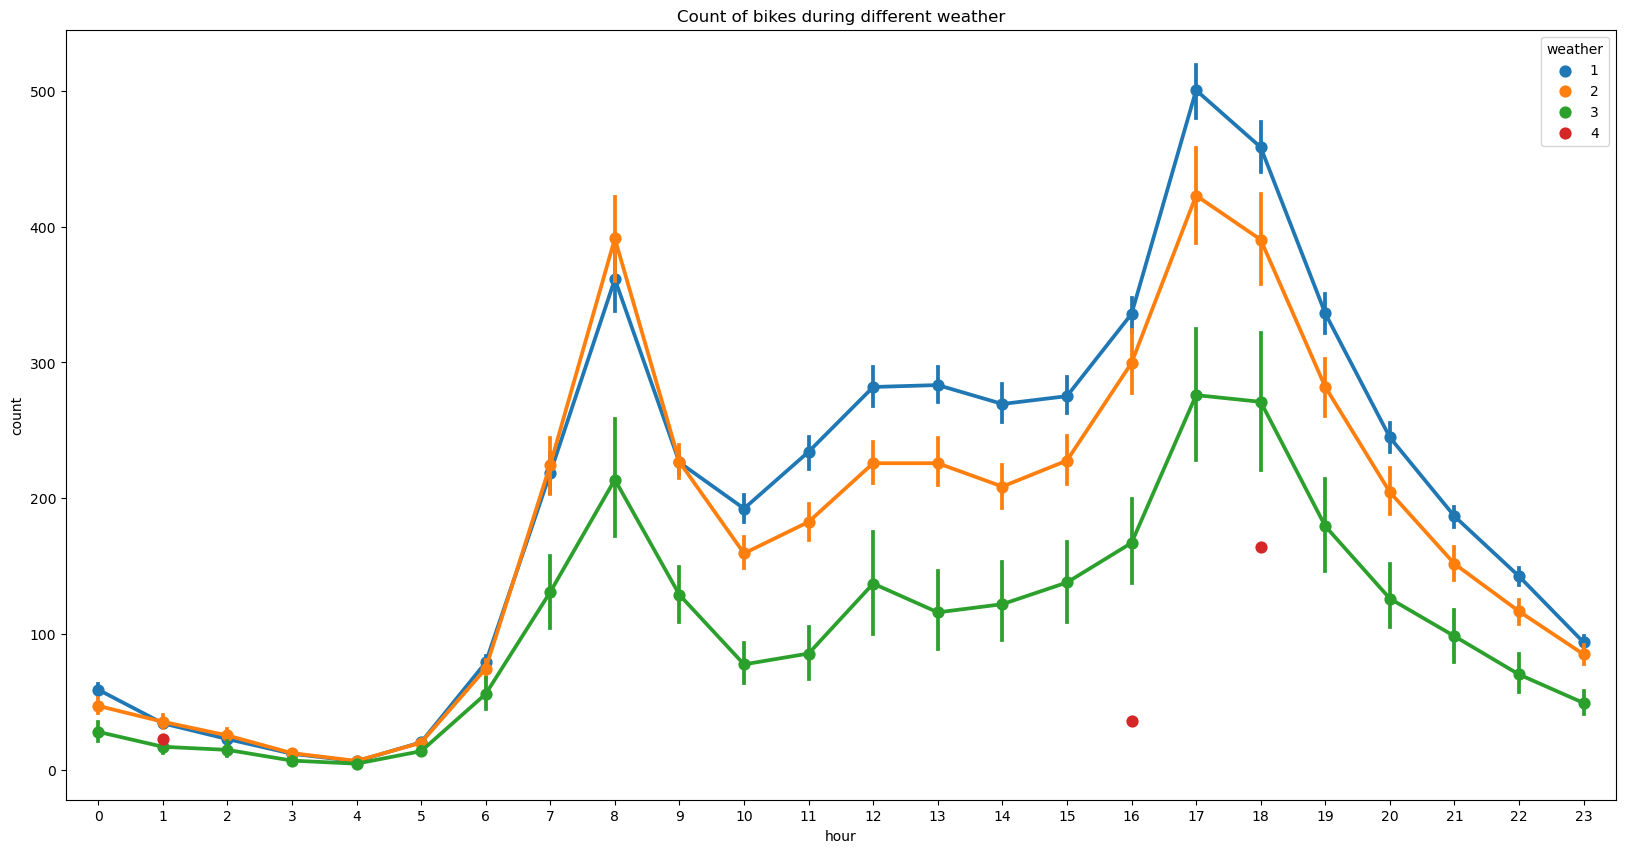

In [32]:
#membuat grafik point plot untuk mengetahui jumlah TOTAL pengguna berdasarkan cuaca
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title = 'Count of bikes during different weather')

[Text(0.5, 1.0, 'Count of bikes during different weather: Unregistered users')]

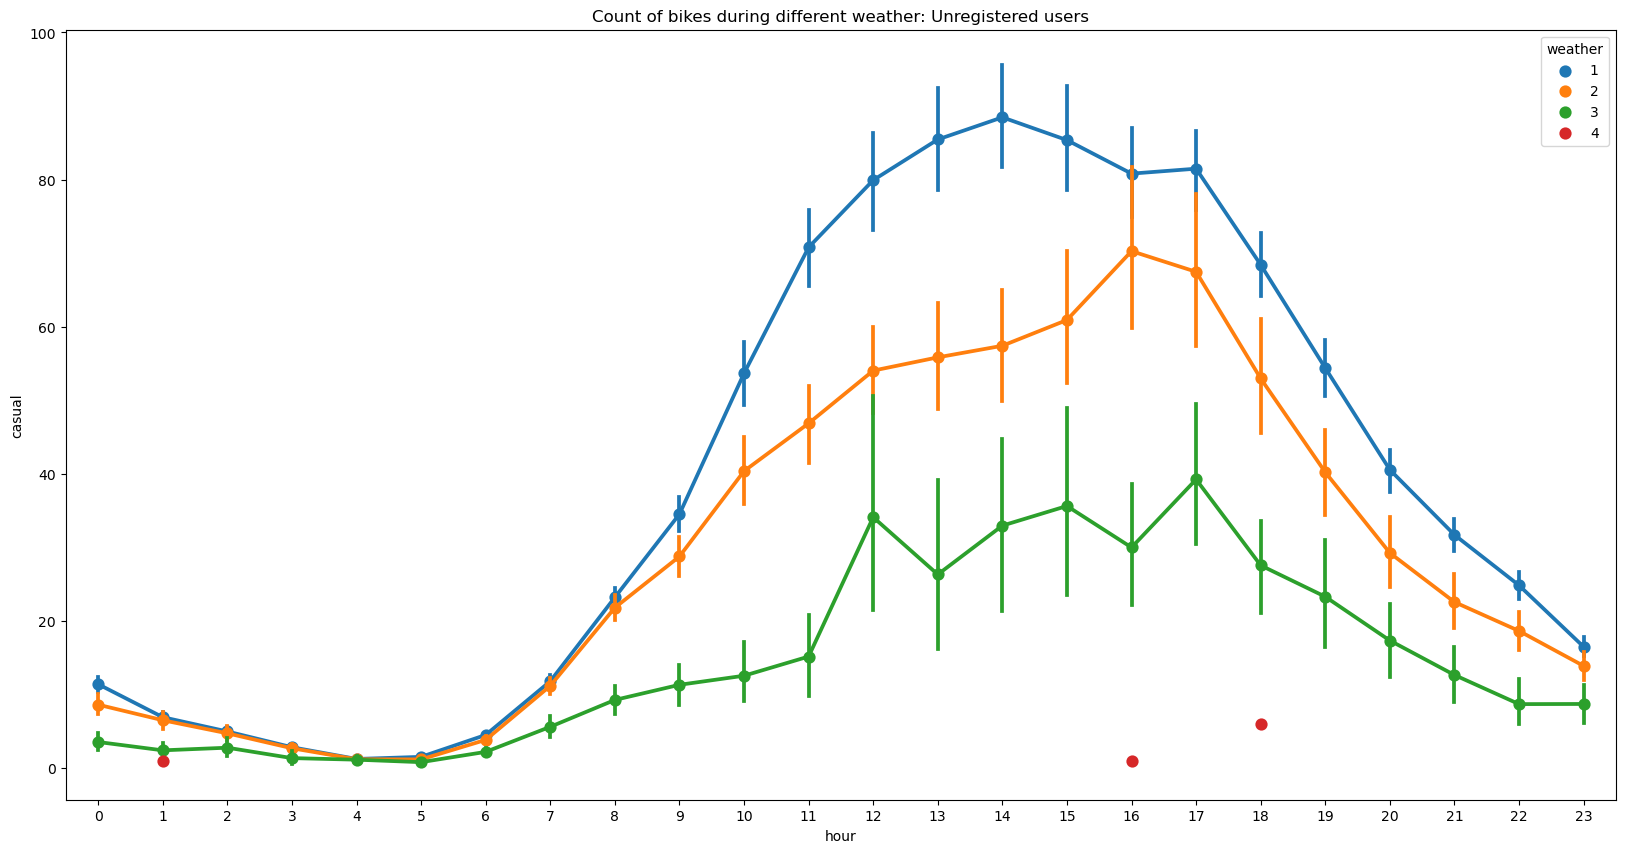

In [33]:
#membuat grafik point plot untuk mengetahui jumlah pengguna unregistered berdasarkan cuaca
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='casual', hue='weather', ax=ax)
ax.set(title = 'Count of bikes during different weather: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during different weather : Registered users')]

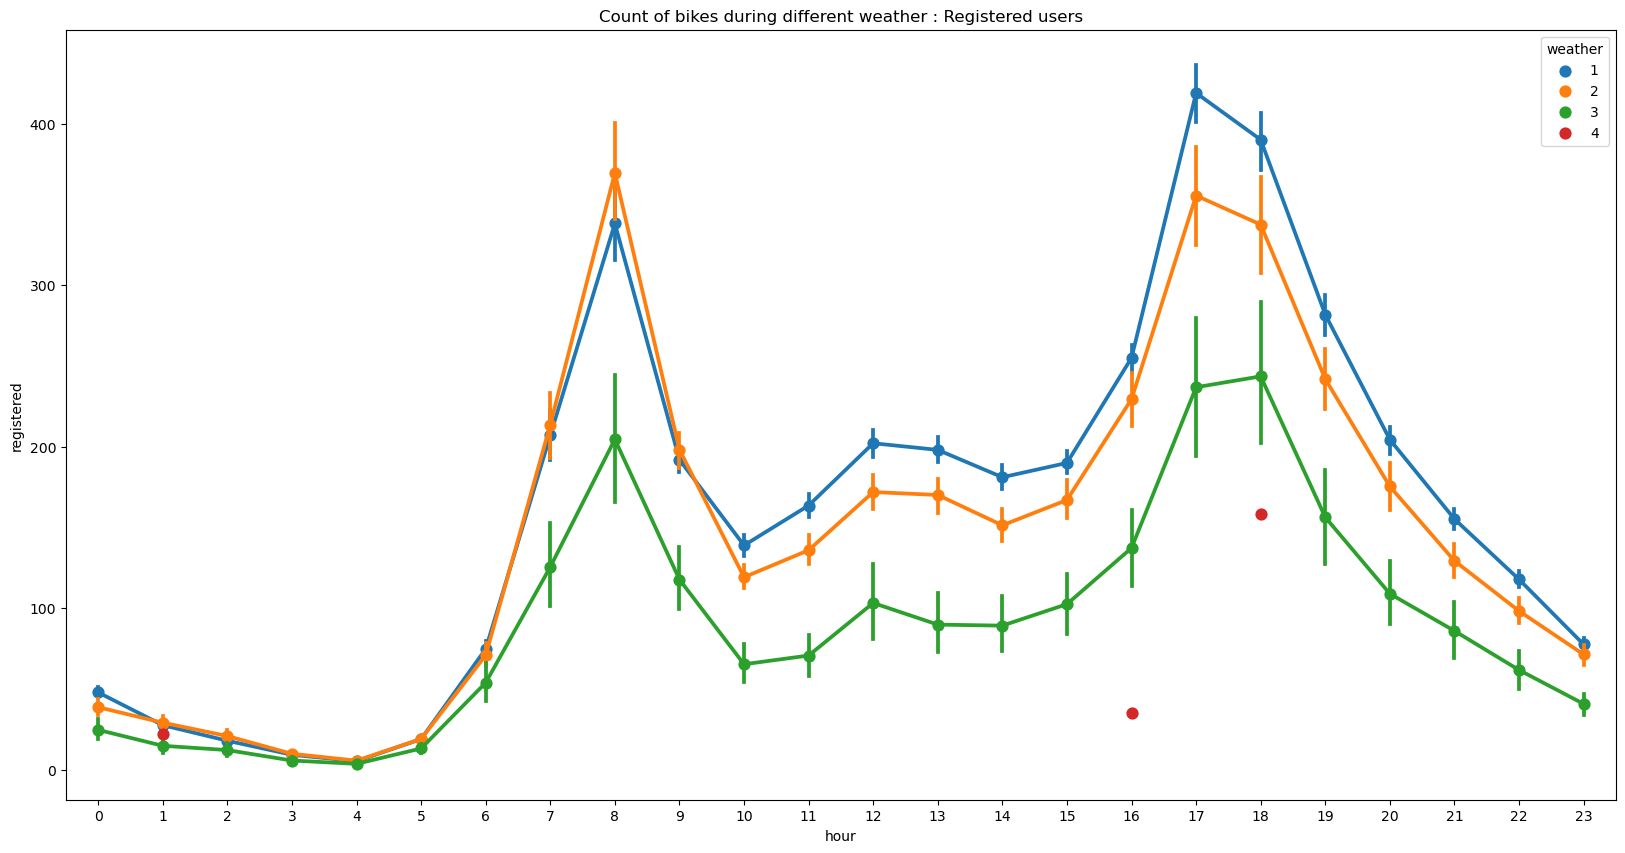

In [34]:
#membuat grafik point plot untuk mengetahui jumlah pengguna registered berdasarkan cuaca
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='registered', hue='weather', ax=ax)
ax.set(title = 'Count of bikes during different weather : Registered users')

### Pertanyaan 3: Apa pengaruh musim terhadap jumlah perentalan?

[Text(0.5, 1.0, 'Count of bikes during different season')]

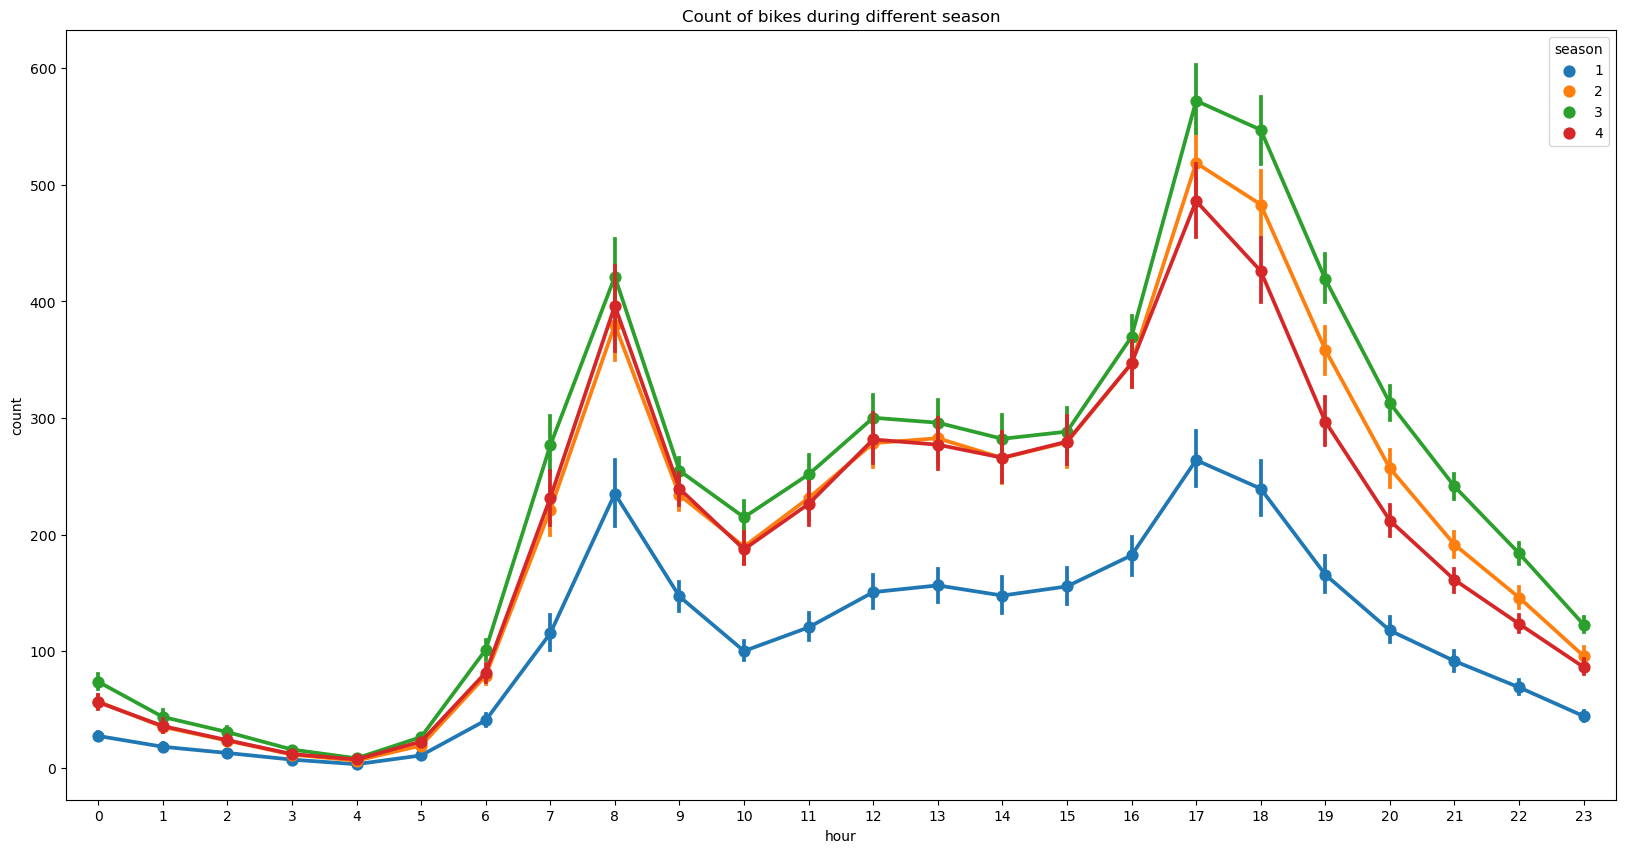

In [35]:
#membuat grafik point plot untuk mengetahui jumlah TOTAL pengguna berdasarkan musim
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='season', ax=ax)
ax.set(title = 'Count of bikes during different season')

[Text(0.5, 1.0, 'Count of bikes during different season: Unregistered users')]

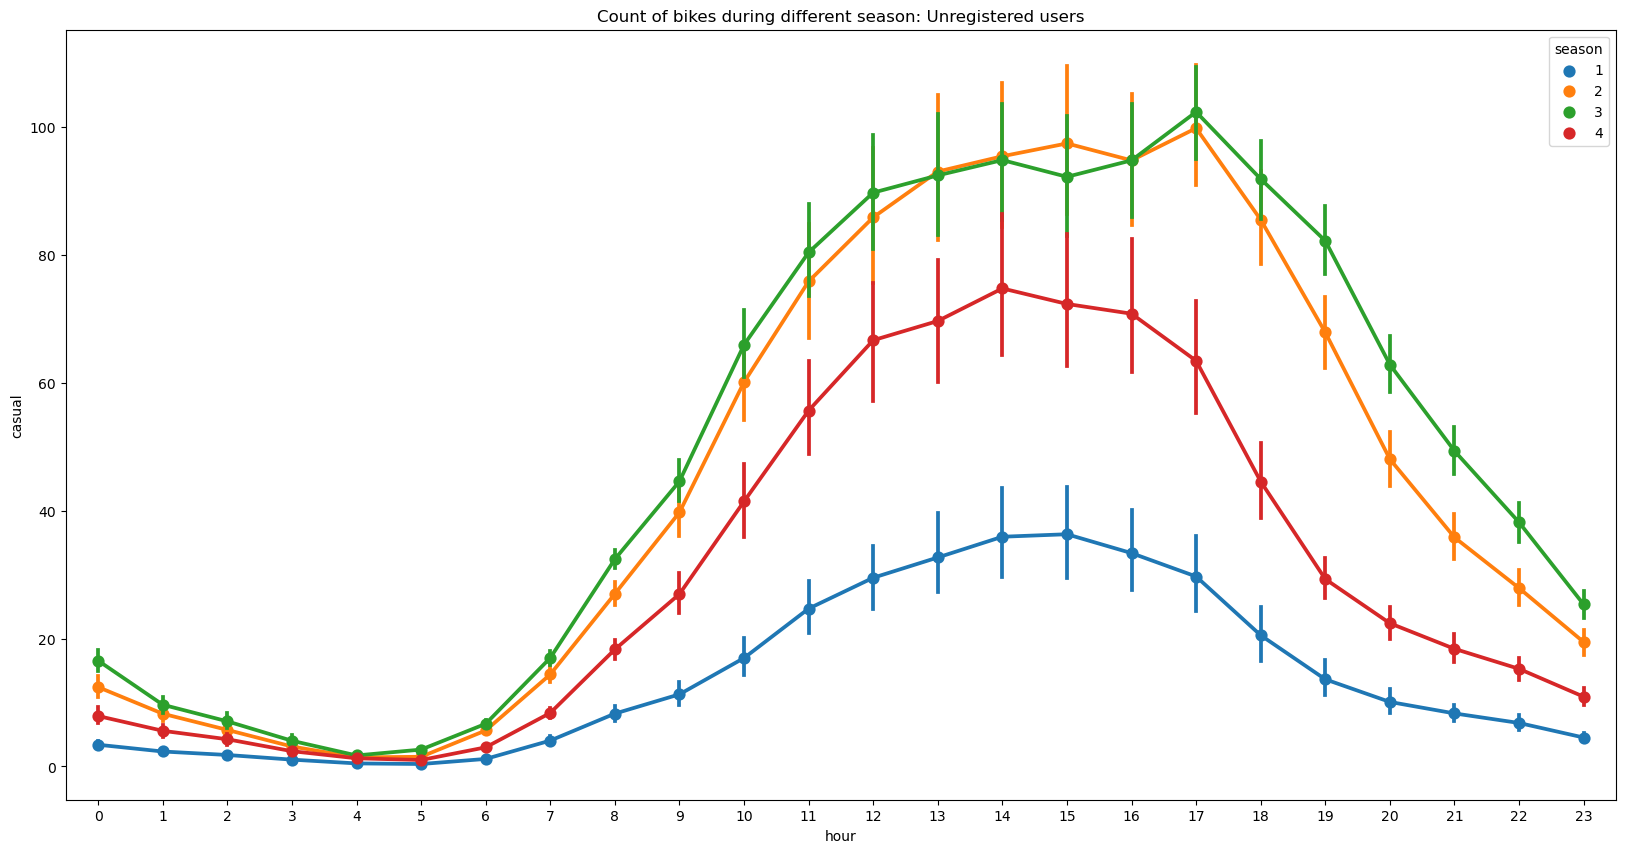

In [36]:
#membuat grafik point plot untuk mengetahui jumlah pengguna unregistered berdasarkan musim
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='casual', hue='season', ax=ax)
ax.set(title = 'Count of bikes during different season: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during different season: Registered users')]

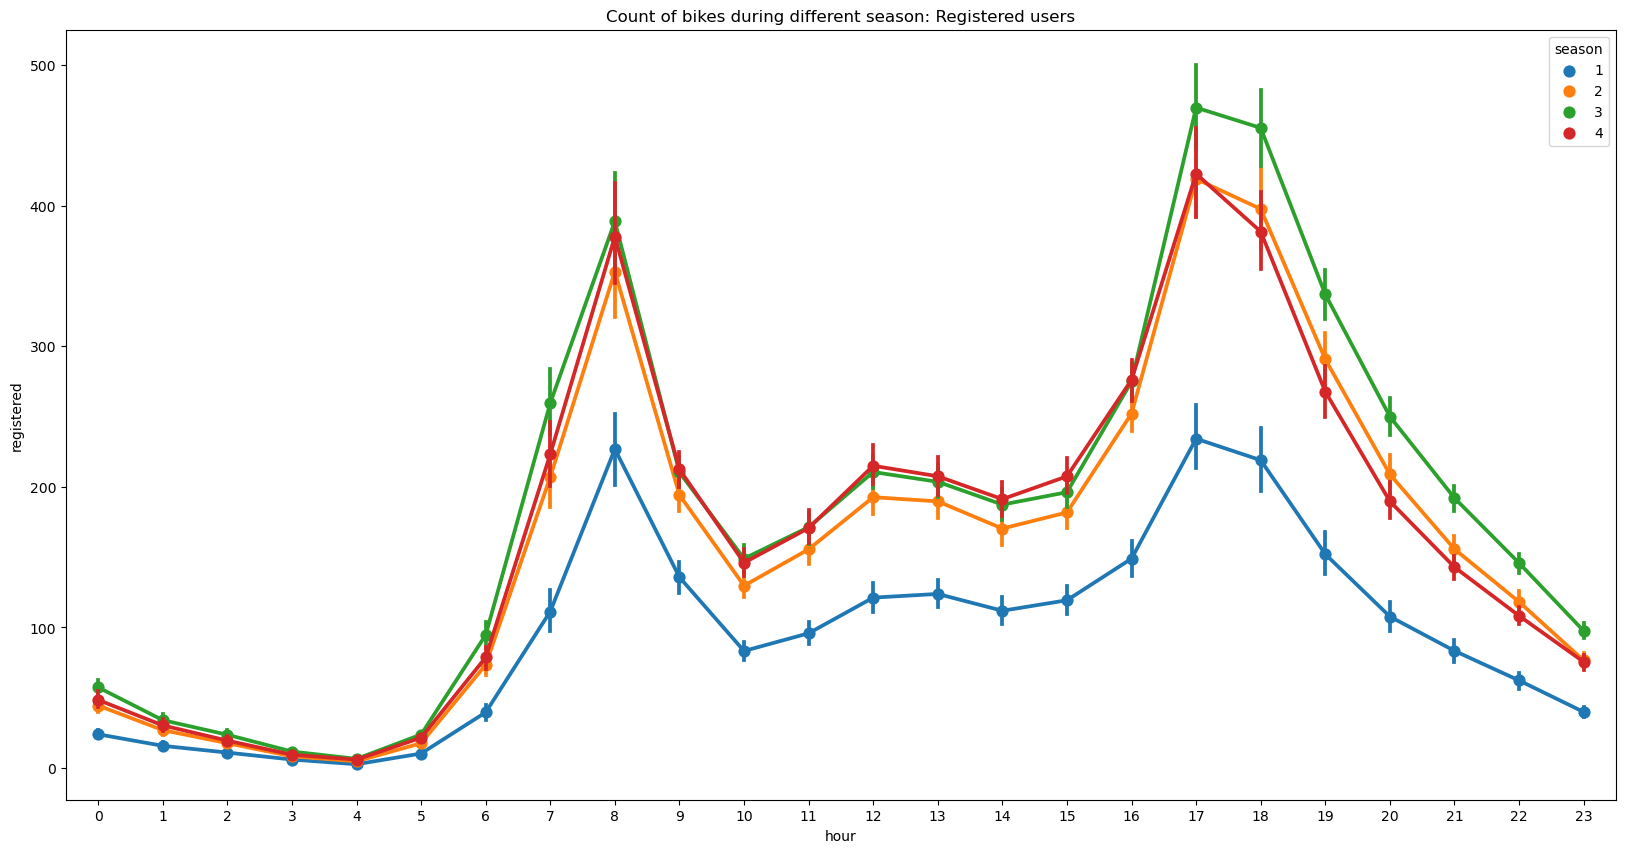

In [37]:
#membuat grafik point plot untuk mengetahui jumlah pengguna registered berdasarkan musim
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='registered', hue='season', ax=ax)
ax.set(title = 'Count of bikes during different season: Registered users')

### Pertanyaan 4: Apa pengaruh (musim) liburan terhadap jumlah perentalan?

[Text(0.5, 1.0, 'Count of bikes during holiday')]

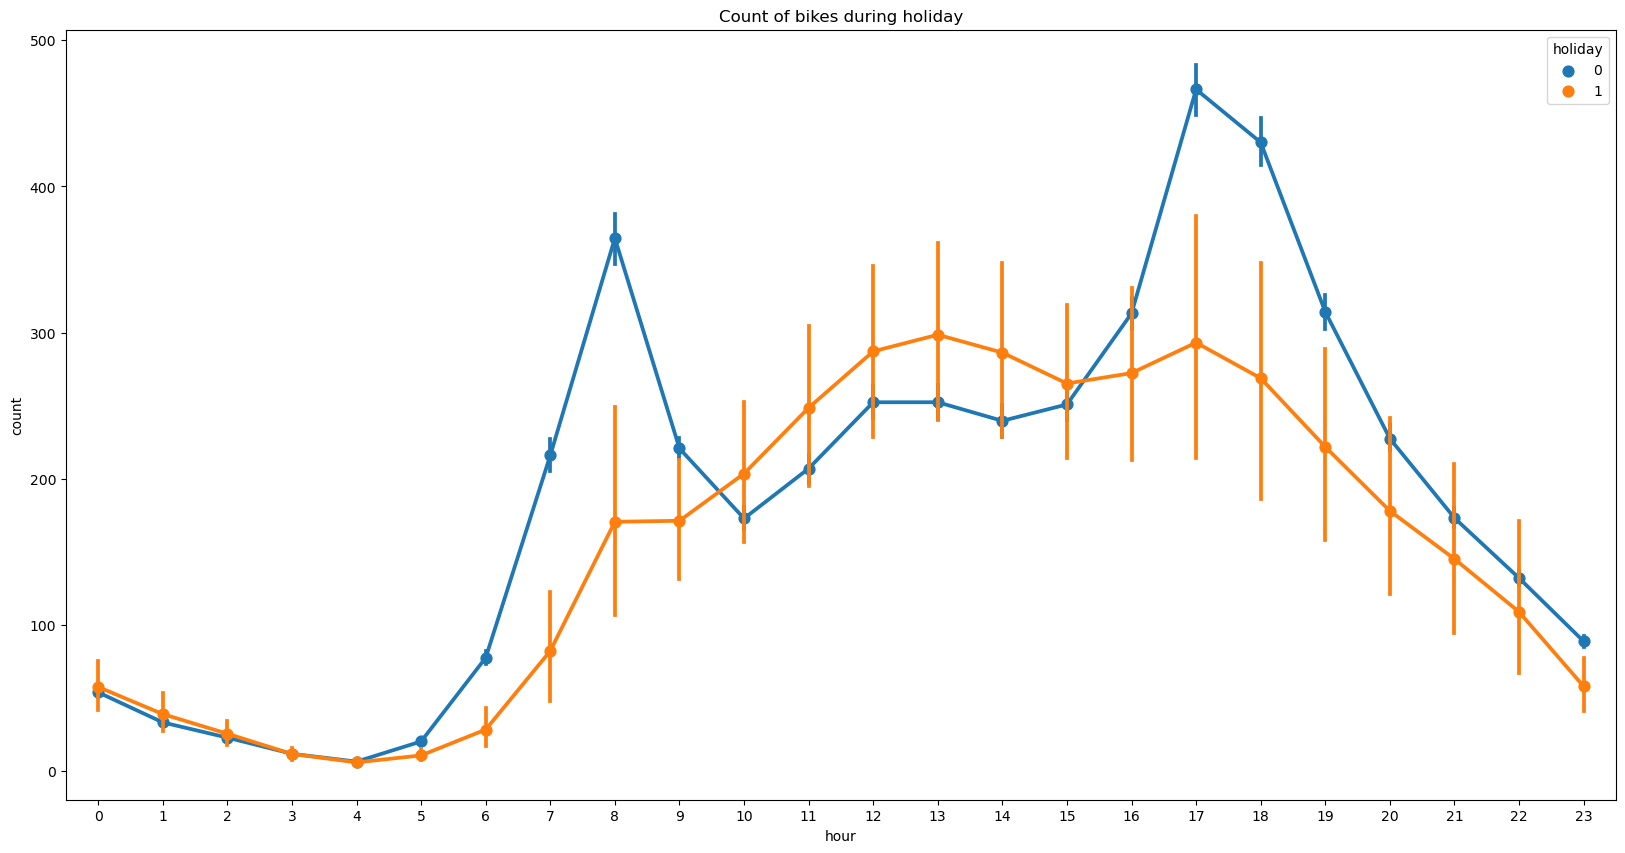

In [38]:
#membuat grafik point plot untuk mengetahui jumlah pengguna berdasarkan musim
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='holiday', ax=ax)
ax.set(title = 'Count of bikes during holiday')

### Pertanyaan 5: berapa jumlah user berdasarkan bulan?

[Text(0.5, 1.0, 'Count of bikes during different month')]

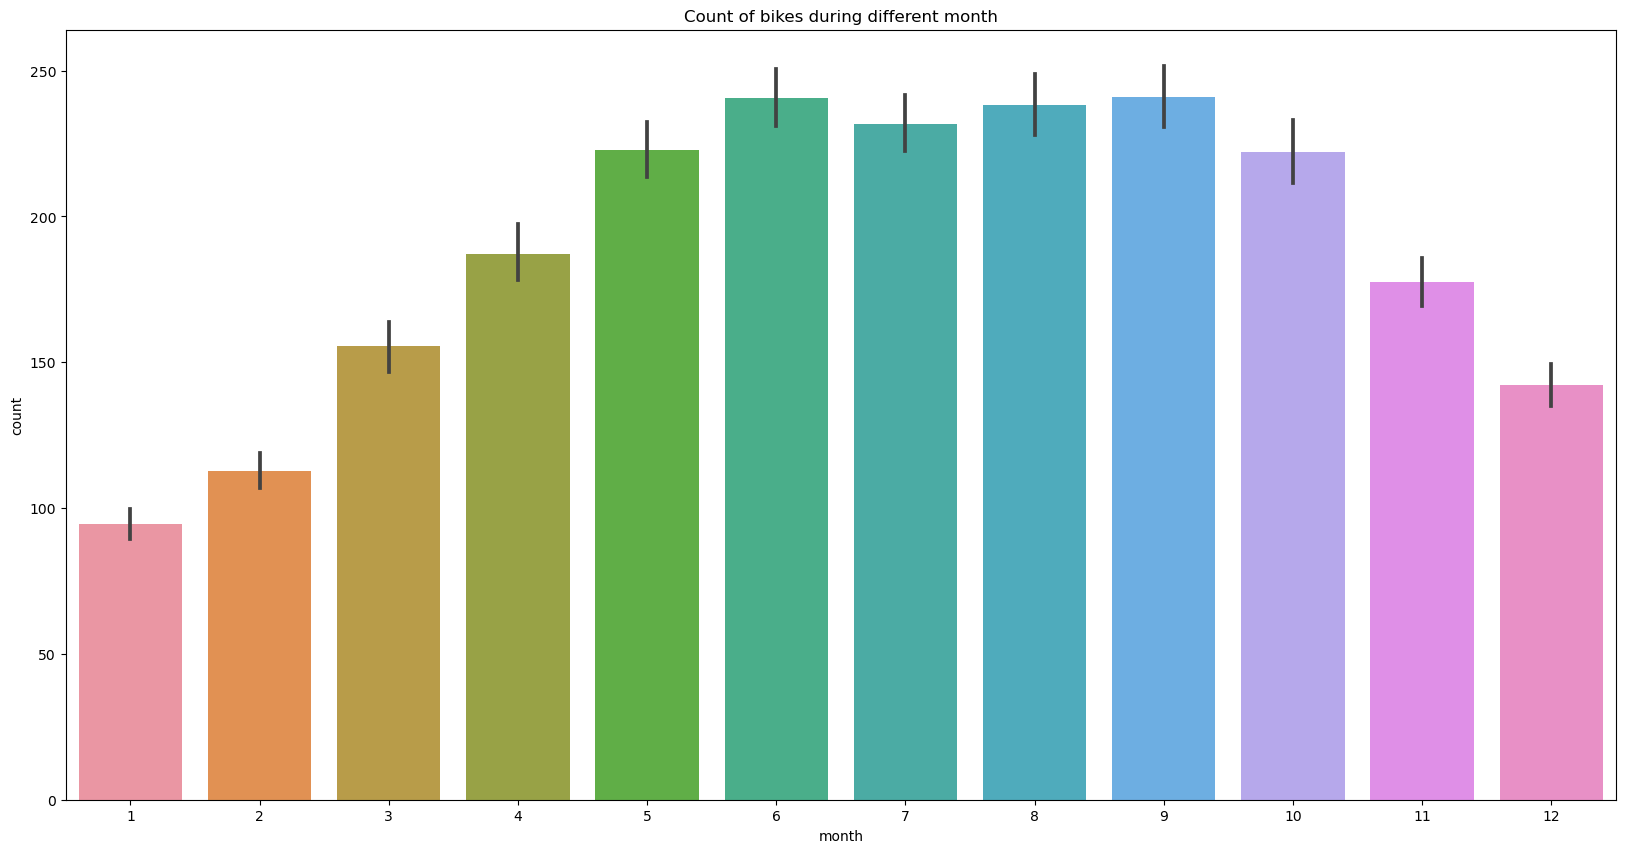

In [39]:
#membuat grafik bar plot untuk mengetahui jumlah pengguna berdasarkan bulan
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hour_df, x='month', y='count', ax=ax)
ax.set(title = 'Count of bikes during different month')

## Penjelasan EDA

Pada tahap Exploratory Data Analysis (EDA) kita mengecek informasi dari 2 data set yakni day dan hour dengan menggunakan fungsi `df.info()`. kemudian kita menampilkan statistik sederhana untuk mengecek apakah ada kejanggalan pada dataset seperti *outlier*, kesalahan input dan lain sebagainya, pada tahap ini menggunakan fungsi `df.describe`.

Pada tahap EDA ini kita menggunakan dataset **day** untuk melakukan explorasi terhadap dataset, sedangkan untuk dataset **hour**, selain kita gunakan pada tahap EDA juga digunakan pada tahap Visualization dan Explanatory Analysis dikarenakan pada dataset **hour** memuat lebih banyak data dan lebih mendetail karena terbagi menjadi tiap jam.

Proses EDA pada dataset **hour** yang pertama adalah mengubah nama kolom yang disingkat agar mempermudah proses analisis menggunakan fungsi `df.rename()`, kemudian menghapus kolom-kolom yang tidak diperlukan untuk analisis seperti kolom instant, dteday dan year dengan menggunakan fungsi `df.drop`. setelah itu kita mengubah beberapa kolom yang berupa *int* menjadi *category* untuk mempermudah analisis dengan menggunakan fungsi `df.astype`.

Proses EDA pada dataset **day** berfungsi untuk mengeksplorasi dataset dengan cara menjawab pertanyaan-pertanyaan yang telah dituliskan dengan menggunakan pivot table. pertanyaan pertama adalah menganalisis keterkaitan antara musim dan jumlah user yang merental sepeda. langkah pertama yang dilakukan pada dataset adalah menyeleksi kolom-kolom dan mengambil hanya kolom yang akan digunakan saja dengan menggunakan fungsi `df.iloc` yang didalamnya terdapat index dari kolom-kolom yang akan digunakan. kemudian untuk mempermudah analisis kita mengganti index angka yang terdapat pada kolom season dengan kategori season sesuai dengan keterangan yang terdapat pada dataset (dalam file README). untuk mengganti index dapat menggunakan fungsi `df.replace`. setelah itu kita mengelompokkan hasil data tersebut berdasarkan kolom season dengan menggunakan fungsi `df.groupby` dan menjumlahkan total keseluruhan data menggunakan `.sum`. Dari hasil analisis menggunakan pivot table dapat disimpulkan bahwa penggunaan rental sepeda paling banyak pada musim gugur dengan 1.061.129 total pengguna, diikuti musim panas, musim dingin dan musim semi. yang mengejutkan adalah penggunaan sepeda di musim semi sangat rendah dengan perbedaan pengguna lebih dari 370.000 dibandingkan musim dingin. untuk faktor musim semi yang mengalami penggunaan terendah dapat ditelusuri lebih dalam penyebabnya karena terdapat banyak faktor didalamnya.

pertanyaan kedua pada dataset **day** adalah bagaimana keterkaitan antara musim liburan dengan jumlah user yang merental sepeda. langkah pertama yang dilakukan pada dataset adalah menyeleksi kolom-kolom dan mengambil hanya kolom yang akan digunakan saja dengan menggunakan fungsi `df.iloc` yang didalamnya terdapat index dari kolom-kolom yang akan digunakan. kemudian untuk mempermudah analisis kita mengganti index angka yang terdapat pada kolom holiday dengan kategori 0 adalah workday/hari kerja dan 1 adalah holiday. untuk mengganti index dapat menggunakan fungsi `df.replace`. setelah itu kita mengelompokkan hasil data tersebut berdasarkan kolom holiday dengan menggunakan fungsi `df.groupby` dan menjumlahkan total keseluruhan data menggunakan `.sum`. Dari hasil analisis menggunakan pivot table dapat disimpulkan bahwa penggunaan rental sepeda lebih banyak dilakukan pada hari kerja dan sangat sedikit yang menggunakan rental di musim libur, yang berarti bahwa mayoritas penggunaan rental sepeda untuk bekerja dan ketika liburan users lebih senang bepergian keluar kota/berada dirumah saja. untuk dapat meningkatkan penggunaan rental sepeda di musim liburan dapat mengadakan campaign/promo pada saat musim liburan.

pertanyaan kedua pada dataset **day** adalah bagaimana keterkaitan antara cuaca dengan jumlah user yang merental sepeda. langkah pertama yang dilakukan pada dataset adalah menyeleksi kolom-kolom dan mengambil hanya kolom yang akan digunakan saja dengan menggunakan fungsi `df.iloc` yang didalamnya terdapat index dari kolom-kolom yang akan digunakan. kemudian untuk mempermudah analisis kita mengganti index angka yang terdapat pada kolom weathersit dengan kategori weather sesuai dengan keterangan yang terdapat pada dataset (dalam file README). untuk mengganti index dapat menggunakan fungsi `df.replace`. setelah itu kita mengelompokkan hasil data tersebut berdasarkan kolom holiday dengan menggunakan fungsi `df.groupby` dan menjumlahkan total keseluruhan data menggunakan `.sum`. Dari hasil analisis menggunakan pivot table dapat disimpulkan bahwa jumlah penggunaan rental sepeda berbanding lurus dengan kondisi cuaca yang ada, dimana ketika cuaca clear atau cerah banyak user yang melakukan rental sepeda dan ketika cuaca mendung/hujan jumlah penggunaan rental sepeda menurun.

## Conclusion

### Conclution pertanyaan 1 : berapa penggunaan rental pada weekdays dan weekend dan pada jam berapakah paling sering terjadi perentalan? 

penggunaan sepeda setiap harinya cenderung sama dengan nilai rata-rata berkisar antara 177-196 orang. dengan kita asumsikan (karena di keterangan dataset tidak ada keterangan perharinya) variabel 0 dan 6 adalah weekend, karena pada variabel 0 dan 6 jumlah pengguna rental menurun karena orang tidak bekerja dan menghabiskan waktu dirumah, hal ini dibuktikan juga pada grafik point plot dimana variabel 0 dan 6 memiliki pola yang berbeda dibandingkan dengan 5 variabel lainnya.

sedangkan jam teramai pada weekdays berdasarkan grafik semua pengguna dimulai dari pagi hari pada jam 6 dengan puncaknya pada jam 8 pagi dengan pengguna diangka 480an, hal ini terjadi karena semua orang melakukan aktifitas yang sama yakni berangkat bekerja/sekolah, kemudian untuk siang hari pada weekdays relatif rendah dan seimbang diangka 130-200 dan melonjak hingga angka 300 pengguna pada weekend, hal ini dikarenakan pada weekend, orang-orang baru beraktifitas pada siang hari, kemudian pada sore hari angka pengguna kembali naik di pukul 16.00 atau jam 4 sore dan puncaknya di jam 5 dan 6 sore, hal ini terjadi dikarenakan pada sore dan malam hari orang-orang menggunakan rental untuk pulang bekerja dan mencari makan malam

untuk pengguna casual/unregistered polanya penggunaan rental berbeda jumlah total pengguna dan pengguna yang menjadi member/registered, untuk weekday pada penggunaan rental pada pengguna casual terbilang rendah setiap harinya sepanjang hari sedangkan pada weekend penggunaan rental cukup tinggi dengan pola teramainya dimulai pukul 8 dan terus naik hingga puncaknya pada siang hingga sore hari.hal ini terjadi karena pengguna casual tidak terlalu membutuhkan jasa rental sepeda dikarenakan kurangnya aktifitas yang menuntut pengguna casual melakukan rental sepeda.

kesimpulannya adalah penggunaan rental sepeda didominasi oleh pengguna registered/ yang sudah menjadi member, hal ini dibuktikan dengan kesamaan pola yang terjadi pada kedua grafik antara grafik total pengguna dan grafik pengguna registered dan juga angka jumlah pengguna pada kedua grafik tersebut. Untuk jam teramai pada weekday terjadi pada pukul 08.00 dan 17.00 sedangkan untuk weekend terjadi pada siang hari. dan untuk meningkatkan jumlah member/registered user adalah dengan memberikan campaign/promo pada pengguna casual.

### Conclution pertanyaan 2: Apa pengaruh cuaca terhadap jumlah perentalan?

pengaruh cuaca berbanding lurus terhadap jumlah perentalan, berdasarkan grafik ketika cuaca bagus/cerah maka banyak orang akan melakukan perentalan sepeda sedangkan jika cuaca sedang tidak bagus seperti saat mendung atau hujan maka jumlah pengguna akan menurun

### Conclution pertanyaan 3: Apa pengaruh musim terhadap jumlah perentalan?

pengaruh cuaca terhadap jumlah perentalan berdasarkan grafik terjadi anomali dimana pada musim semi jumlah pengguna memiliki nilai terendah diantara ketiga musim lainnya seperti musim panas, musim gugur, dan musim dingin. perbedaan jumlah pengguna pada musim semi dengan musim dingin yang ranking jumlah penggunanya 1 tingkat diatasnya juga cukup signifikan, yakni dapat mencapai lebih dari 370 ribu pengguna. hal ini perlu dianalisa lebih dalam lagi mengapa penggunaan rental sepeda di musim yang ramah pengguna dapat lebih kecil dibanding musim dingin yang tidak ramah pengguna, selain itu dapat juga menanyakan kepada pembuat dataset untuk memastikan tidak adanya kesalahan dari pengguna (seperti contoh salah menginput yang seharusnya paling rendah itu musim dingin tapi salah menginput jadi musim semi).

## BONUS Conclusion

### Conclution pertanyaan 4: Bagaimana perbandingan antara hari biasa dengan musim liburan?

berdasarkan grafik menunjukkan jumlah pengguna rental sepeda lebih banyak terjadi pada hari kerja/work day dibandingkan dengan musim liburan dengan perbandingan jumlah yang sangat signifikan, hal ini disebabkan ketika musim liburan orang-orang/pengguna banyak melakukan aktifitas diluar kota atau beraktifitas dirumah saja